In [94]:
import os
import obspy
#filepath = '/data/SDS_MV/2001/MV/MBRY/BHZ.D/MV.MBRY..BHZ.D.2001.062'
filepath = '/data/SEISAN_DB/WAV/MVOE_/2000/04/2000-04-03-1004-19S.MVO___019'
raw = obspy.read(filepath)


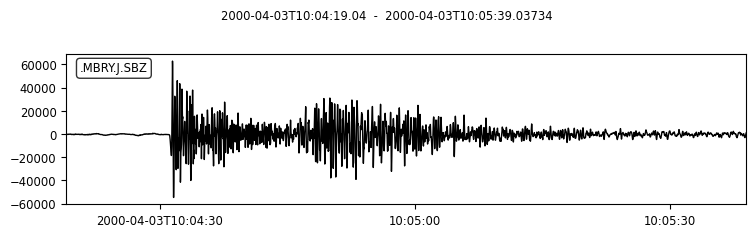

0 .MBRY.J.SBZ
1 .MBSS.J.S Z
2 .MBBY.J.SBZ
3 .MBGH.J.SBZ
4 .MBWH.J.S Z
5 .MBGB.J.SBZ
6 .MBMH.J.S Z


In [95]:
etime = raw[0].stats.starttime + 80
raw = raw.copy()
raw=raw.select(component='Z')
raw.trim(endtime=etime)
raw.remove(raw.select(station='MBLG')[0])
raw[0].plot();
for i,tr in enumerate(raw):
    print(i, tr.id)



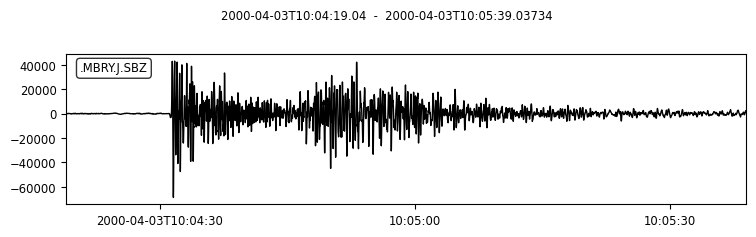

In [96]:
filtered = raw.copy()
filtered.filter('highpass', freq=0.5, corners=8)
filtered[0].plot();

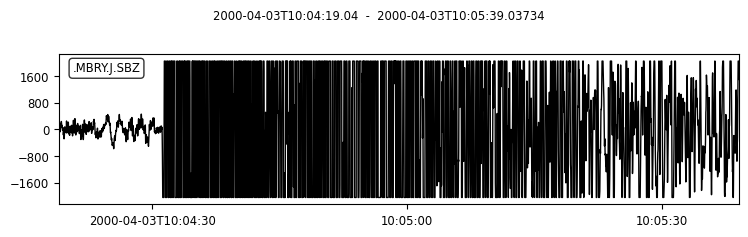

In [97]:
clipped = filtered.copy()
data = clipped[0].data
data[data>2048]=2048
data[data<-2048]=-2048
clipped[0].data = data
clipped[0].plot();

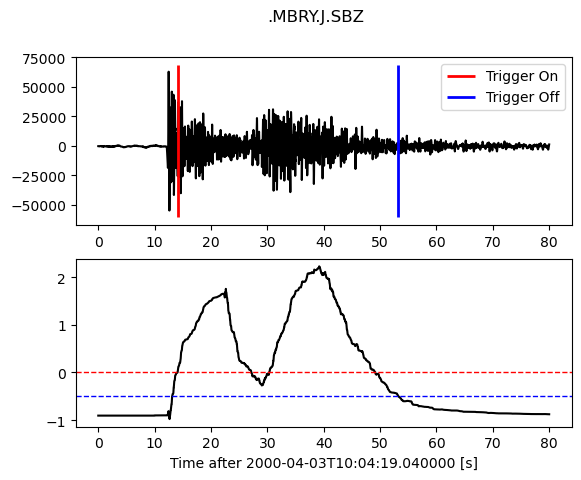

In [ ]:
from obspy.signal.trigger import classic_sta_lta, plot_trigger
tr = raw[0]
df = tr.stats.sampling_rate
cft = z_detect(tr.data, int(10*df))
plot_trigger(tr, cft, 0, -0.5)

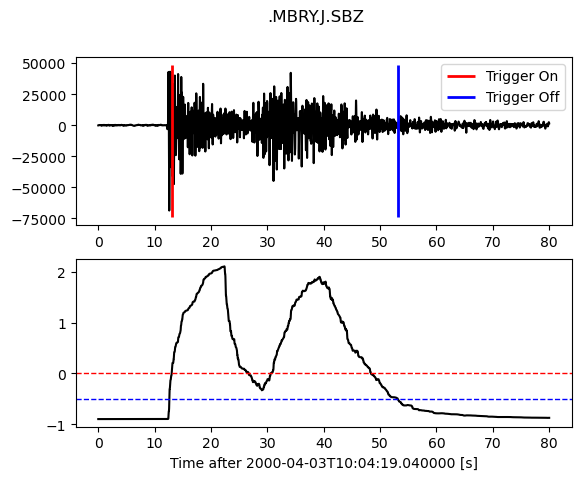

In [98]:
from obspy.signal.trigger import classic_sta_lta, plot_trigger, z_detect
tr = filtered[0]
df = tr.stats.sampling_rate
cft = z_detect(tr.data, int(10*df))
plot_trigger(tr, cft, 0, -0.5)

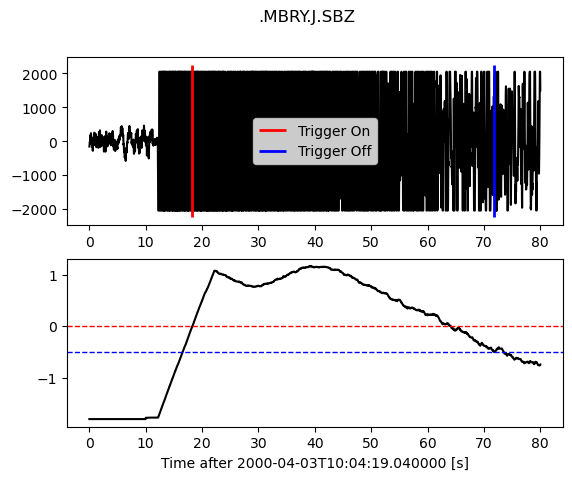

In [99]:
from obspy.signal.trigger import classic_sta_lta, plot_trigger
tr = clipped[0]
df = tr.stats.sampling_rate
cft = z_detect(tr.data, int(10*df))
plot_trigger(tr, cft, 0, -0.5)